### Pacotes

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Dicionário de Variáveis utilizadas

UPA: Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))

V1008: Número do Domicílio

Estrato

V1014: Painel - Grupo de Amostra

V1016: Número de entrevista (1 a 5)

V2003: Número de ordem

V1028: Peso dos domicílios e das pessoas

V2007: Sexo (Mapeamento para as variáveis: Homem - 0, Mulher - 1)

V2008: Dia Nascimento

V20081: Mês nascimento

V20082: Ano nascimento

V1028: Peso do domicílio e das pessoas sem calibração

VD4019: Rendimento mensal habitual de todos os trabalhos para pessoas de 14 anos ou mais de idade

VD1029: Projeção da população

Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

#### Importação e tratamento dos microdados

In [214]:
#determina qual diretório usar para cada sistema operacional
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\'
else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/'



#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA','Estrato', 'UF', 'V1008', 'V1014', 'V2003', 'V2007', 'V2008', 'V20081', 'V20082', 'V4022', 'V1016', 'V1028', 'V1029', 'VD4019']

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='latin-1')
        if 2019 < ano < 2022:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='latin-1')
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='latin-1')

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [215]:
#Função para automalizar importação das bases da pnad com as variáveis desejadas

def importa_pnad(path, ano_inicial, ano_final, colunas):
    '''
    path: somente o diretório onde os arquivos estão armazenados.
    ano_inicial: ano inicial do período analisado.
    ano_final: ano final do período analisado.
    '''
    
    for ano in range(ano_inicial, ano_final+1):
        for tri in range(1, 5):
            if ano == 2019  and tri > 3:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
            if 2019 < ano < 2022:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
            if ano == 2022 and tri < 3:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
    print('Dados importados com sucesso!')


#path = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\'
#colunas = ['Ano', 'Trimestre', 'UPA','Estrato', 'UF', 'V1028', 'V2007']
#importa_pnad(path, 2022, 2022, colunas)

In [216]:
#Conversão das variável V2007(sexo) para inteira. Homem = 0, Mulher = 1
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)


In [217]:
#dataframe com a ID da pessoa e a variável de interesse

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'Estrato':globals()[f'pnad_{ano}_{tri}']['Estrato'],  
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                        'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                        'VD4019': globals()[f'pnad_{ano}_{tri}']['VD4019']})
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'Estrato':globals()[f'pnad_{ano}_{tri}']['Estrato'],  
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                        'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                        'VD4019': globals()[f'pnad_{ano}_{tri}']['VD4019']})
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'Estrato':globals()[f'pnad_{ano}_{tri}']['Estrato'],  
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                        'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                        'VD4019': globals()[f'pnad_{ano}_{tri}']['VD4019']})

In [218]:
pnadc_completa = pd.concat([pnad_2019_4_id_local, 
                            pnad_2020_1_id_local, 
                            pnad_2020_2_id_local, 
                            pnad_2020_3_id_local, 
                            pnad_2020_4_id_local, 
                            pnad_2021_1_id_local, 
                            pnad_2021_2_id_local, 
                            pnad_2021_3_id_local, 
                            pnad_2021_4_id_local, 
                            pnad_2022_1_id_local, 
                            pnad_2022_2_id_local])

In [219]:
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)

In [220]:
#concatenar coluna ano e trimestre em uma única coluna
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)

In [221]:
#Conversão para o formato data e criação da coluna de Ano e Trimestre 
pnadc_completa['ano_tri'] = pd.PeriodIndex(pnadc_completa['ano_tri'], freq='Q')

In [222]:
display(pnadc_completa)

,Ano,Trimestre,UPA,Estrato,V2007,ID,V4022,V1016,V1028,V1029,VD4019,ano_tri
0,2019,4,110000016,1110011,1,110002004,NaN,4,145.628790,532471,2100.0,2019Q4
1,2019,4,110000016,1110011,1,110002036,NaN,4,145.628790,532471,NaN,2019Q4
2,2019,4,110000016,1110011,1,110002054,NaN,4,145.628790,532471,NaN,2019Q4
3,2019,4,110000016,1110011,0,110002081,NaN,4,145.628790,532471,NaN,2019Q4
4,2019,4,110000016,1110011,0,110002013,NaN,4,134.017538,532471,NaN,2019Q4
...,...,...,...,...,...,...,...,...,...,...,...,...
482113,2022,2,530057544,5310220,0,530059587,NaN,3,81.626590,3125014,600.0,2022Q2
482114,2022,2,530057544,5310220,0,530059544,NaN,3,72.323502,3125014,1500.0,2022Q2
482115,2022,2,530057544,5310220,0,530059580,NaN,3,72.323502,3125014,1500.0,2022Q2
482116,2022,2,530057544,5310220,1,530059589,NaN,3,72.323502,3125014,NaN,2022Q2


#### Exploração

In [223]:
pd.crosstab(index=pnadc_completa['ano_tri'],
                             columns=pnadc_completa['V4022'])

V4022,"Em domicílio de empregador, patrão, sócio ou freguês",Em estabelecimento de outro négocio/empresa,"Em local designado pelo empregador, cliente ou freguês","Em outro local, especifique","Em veículo automotor (táxi, ônibus, caminhão, automóvel, embarcação, etc.)","Em via ou área pública (rua, rio, manguezal, mata pública, praça, praia etc.)","No domicílio de residência, em local exclusivo para o desempenho da atividade","No domicílio de residência, sem local exclusivo para o desempenho da atividade"
ano_tri,,,,,,,,
2019Q4,1793,2730,25829,618,8547,5869,4381,6485
2020Q1,1409,2294,22061,494,7718,5093,3907,5775
2020Q2,879,1775,14374,315,5343,2832,2980,4024
2020Q3,914,1653,14807,365,4947,2786,3184,4299
2020Q4,938,1519,14165,354,4721,2836,3397,4379
2021Q1,876,1316,13537,318,4420,2721,3401,4372
2021Q2,1025,1416,15292,368,4858,3256,4021,4959
2021Q3,1373,1741,19487,494,6129,4336,5007,6170
2021Q4,1463,1857,21155,604,6470,4602,5345,6531


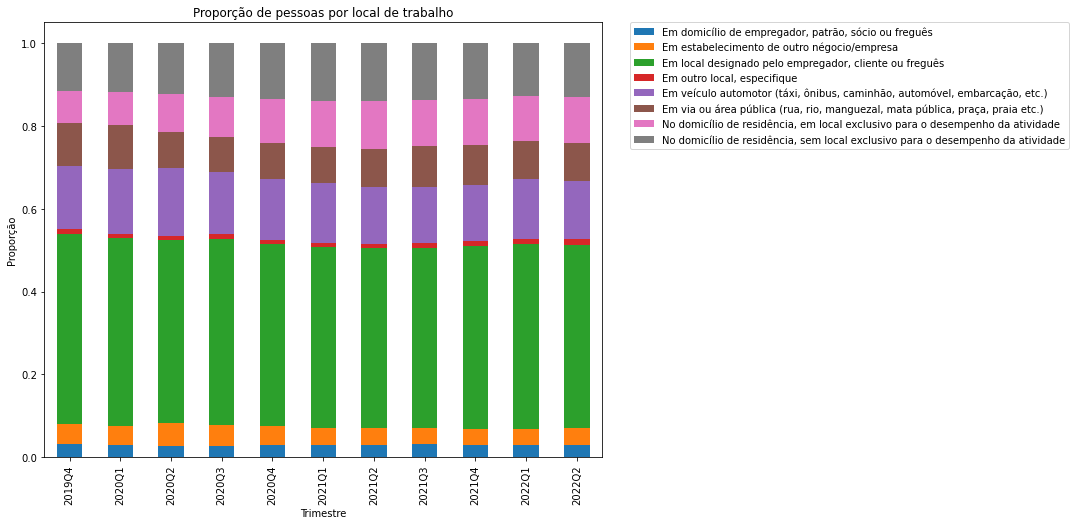

In [224]:
cross_tab_prop = pd.crosstab(index=pnadc_completa['ano_tri'],
                             columns=pnadc_completa['V4022'],
                             normalize="index")


cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 8), title='Proporção de pessoas por local de trabalho')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Trimestre')
plt.ylabel('Proporção')

plt.show()

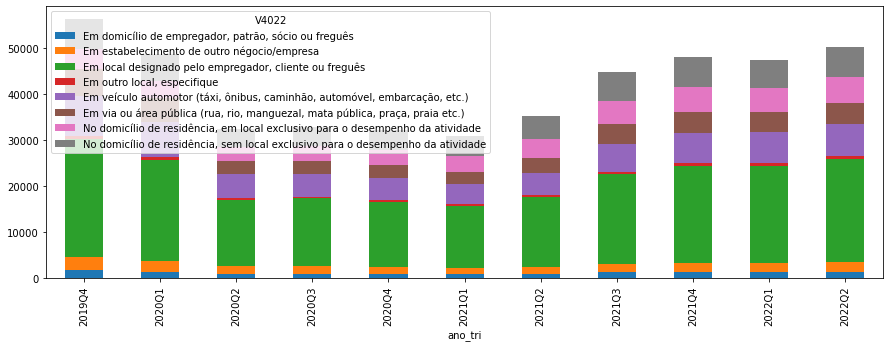

In [225]:
pnadc_completa.groupby('ano_tri')['V4022'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()

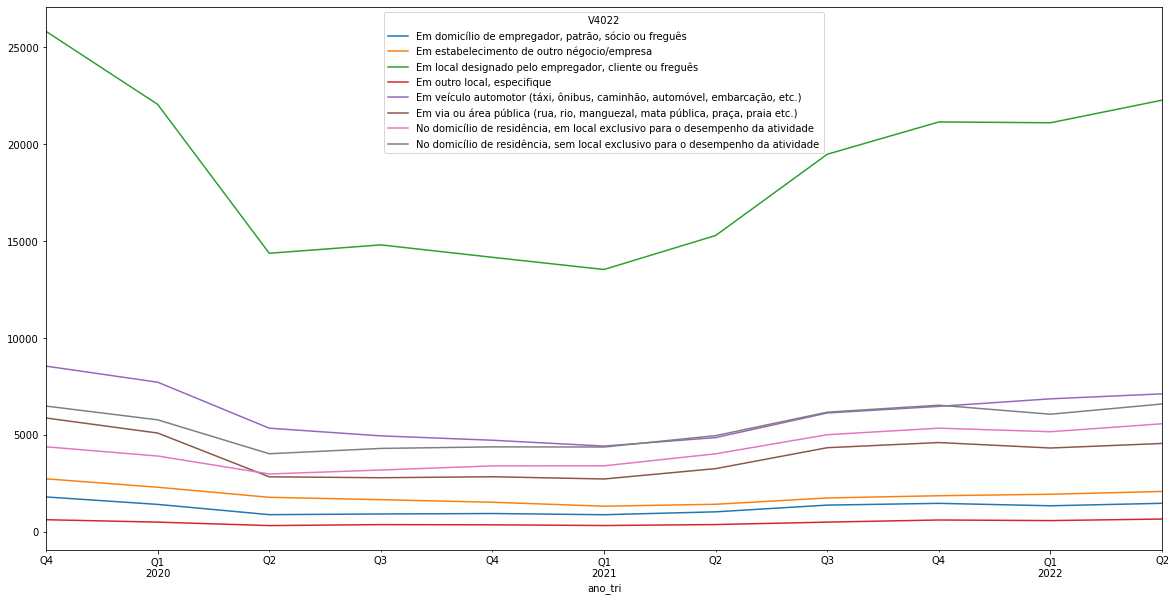

In [226]:
fig, ax = plt.subplots(figsize=(20, 10))
pnadc_completa.groupby('ano_tri')['V4022'].value_counts().unstack().plot(ax=ax)
plt.show()

#### Estimação de valores para a população

In [227]:
pnadc_completa

,Ano,Trimestre,UPA,Estrato,V2007,ID,V4022,V1016,V1028,V1029,VD4019,ano_tri
0,2019,4,110000016,1110011,1,110002004,NaN,4,145.628790,532471,2100.0,2019Q4
1,2019,4,110000016,1110011,1,110002036,NaN,4,145.628790,532471,NaN,2019Q4
2,2019,4,110000016,1110011,1,110002054,NaN,4,145.628790,532471,NaN,2019Q4
3,2019,4,110000016,1110011,0,110002081,NaN,4,145.628790,532471,NaN,2019Q4
4,2019,4,110000016,1110011,0,110002013,NaN,4,134.017538,532471,NaN,2019Q4
...,...,...,...,...,...,...,...,...,...,...,...,...
482113,2022,2,530057544,5310220,0,530059587,NaN,3,81.626590,3125014,600.0,2022Q2
482114,2022,2,530057544,5310220,0,530059544,NaN,3,72.323502,3125014,1500.0,2022Q2
482115,2022,2,530057544,5310220,0,530059580,NaN,3,72.323502,3125014,1500.0,2022Q2
482116,2022,2,530057544,5310220,1,530059589,NaN,3,72.323502,3125014,NaN,2022Q2


In [228]:
#Renda Média Habitual para a população em 2T2022b

from samplics.estimation import TaylorEstimator

media_rendimento = TaylorEstimator("mean")
media_rendimento.estimate(
    y=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["VD4019"],
    samp_weight=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["V1028"],
    stratum=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["Estrato"],
    psu=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["UPA"],
    remove_nan=True,
)

print(media_rendimento)

SAMPLICS - Estimation of Mean

Number of strata: 573
Number of psus: 14998
Degree of freedom: 14425

       MEAN       SE         LCI         UCI       CV
2652.133731 24.89664 2603.333117 2700.934344 0.009387


In [239]:
populacao_total = TaylorEstimator("total")
populacao_total.estimate(
    y=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["V1029"],
    samp_weight=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["V1028"],
    stratum=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["Estrato"],
    psu=pnadc_completa[pnadc_completa['ano_tri']=='2022Q2']["UPA"],
    remove_nan=True,
)

print(populacao_total)

SAMPLICS - Estimation of Total

Number of strata: 573
Number of psus: 15034
Degree of freedom: 14461

       TOTAL           SE          LCI          UCI       CV
1.775657e+15 1.486368e+13 1.746522e+15 1.804791e+15 0.008371


In [230]:
pnadc_completa[(pnadc_completa['Ano']==2022)&(pnadc_completa['Trimestre']==2)].groupby('V2007').size()

V2007
0    233756
1    248362
dtype: int64

Encontrar outros questionários de outras caraterísticas


In [231]:
#Função para estimar média agrupada por alguma coluna

def weighted_average(df,data_col,weight_col,by_col):
    df['_data_times_weight'] = df[data_col]*df[weight_col]
    df['_weight_where_notnull'] = df[weight_col]*pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result

In [232]:
weighted_average(pnadc_completa, 'VD4019', 'V1028', 'ano_tri')

ano_tri
2019Q4    2322.524201
2020Q1    2380.950817
2020Q2    2475.653982
2020Q3    2522.783175
2020Q4    2481.701123
2021Q1    2519.247625
2021Q2    2497.543541
2021Q3    2459.456258
2021Q4    2447.338404
2022Q1    2548.056800
2022Q2    2652.133731
Freq: Q-DEC, dtype: float64